In [52]:
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import Axes3D
import numpy as np
import pandas as pd
from scipy import stats



# Load and specify column names
profits = pd.read_csv("/Users/Valina/Documents/DSML-Projects/MLFoundations_CaseStudyApproach/data/ex1data1.txt", names=['population','earnings'])


# Linear fit with scipy
###slope, intercept, r_value, p_value, std_err = stats.linregress(profits['population'], profits['earnings'])


# Cost Function and its derivatives
def J(par0, par1, df):
    cost = (par1*df['population'] + par0 - df['earnings'])**2
    return cost.sum()/(2*len(df.index))

def dJi(par0, par1, df, i_par):
    dcosti = (par1*df['population'] + par0 - df['earnings'])*(df['population']**i_par)
    return dcosti.sum()/len(df.index) 

## Main

In [111]:
# initialize parameters and variables
intercept = 0.0
slope = 0.0
cost_fn0 = 0.0 #J(intercept, slope, profits)
dcost_fn = 10000
alpha = 0.01
i = 0

while dcost_fn > 1e-06:
    i+= 1
    # update parameters simultaneously
    theta0 = intercept - alpha*dJi(intercept, slope, profits, 0)
    theta1 = slope - alpha*dJi(intercept, slope, profits, 1)
    intercept = theta0
    slope = theta1
    # recalculate cost and its gradient
    cost_fn = J(intercept, slope, profits)
    dcost_fn = abs(cost_fn - cost_fn0)
    cost_fn0 = cost_fn
    
print(i, dcost_fn, cost_fn, intercept, slope)
    



2372 9.97453076579e-07 4.47724729942 -3.84072805856 1.1875029913


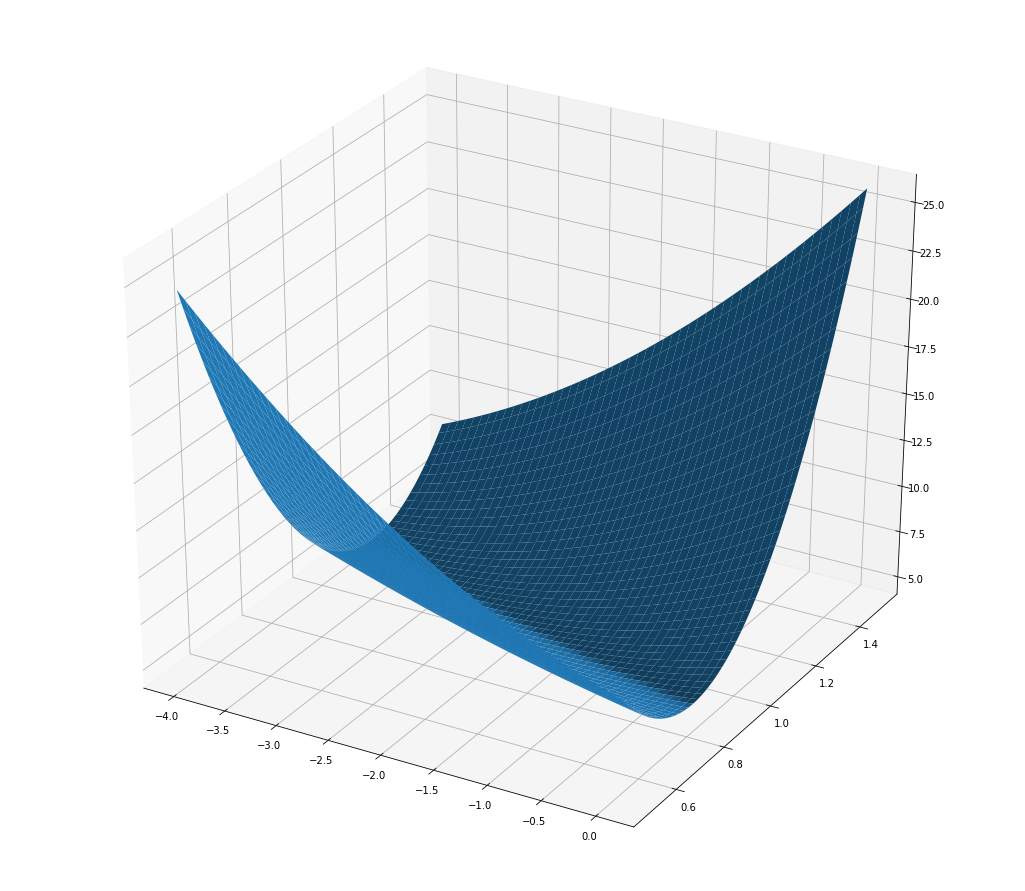

In [109]:
fig = plt.figure(figsize=(18,16))
ax = fig.add_subplot(111, projection='3d')
p = 200
X = np.linspace(-4, 0.05, p)
Y = np.linspace(0.5, 1.5, p)
X, Y = np.meshgrid(X, Y, sparse=False, indexing='ij')
Z = np.zeros(shape=(p,p))
for i in range(p):
    for j in range(p):
        Z[i,j] = J(X[i,j], Y[i,j], profits)
        


surf = ax.plot_surface(X, Y, Z, rstride=4, cstride=4, linewidth=0)
plt.show()
